<a href="https://colab.research.google.com/github/Szinacska/CI-CD-Project/blob/main/MNIST_Keras_test_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# we import some objects and functions from the keras package
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
# we also import matplotlib to visualize images
import matplotlib.pyplot as plt

# Data Preparation

In [ ]:
# we load MNIST  data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# we can have a look at the data structures
# print(type(X_train)) # <class 'numpy.ndarray'>
# how many samples? How many pixels?
# print(X_train.shape) # (60000, 28, 28)
# print(X_train[0]) # to have a look at pixel data
# print(X_train[0].shape) # (28, 28)
# print(type(y_train)) # <class 'numpy.ndarray'>
# print(y_train.shape) # how many samples? (60000,)
# print(y_train[0]) # 5


In [ ]:
# want to see numbers forming an image?

# import pandas as pd
# import numpy as np
# pd.set_option('display.max_columns', 30)
# pd.DataFrame(X_train[0])

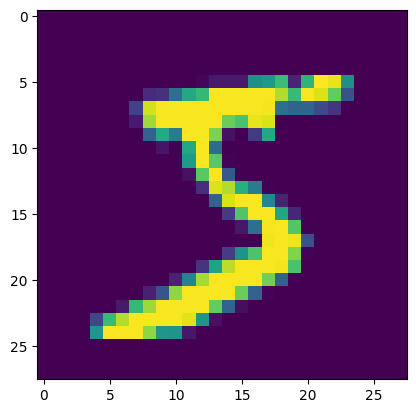

In [ ]:
plt.imshow(X_train[0])

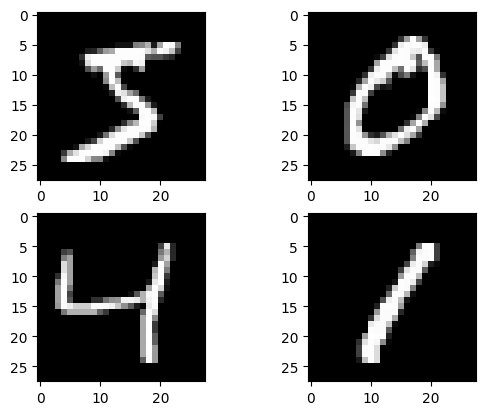

In [ ]:
# Plot ad hoc mnist instances
# plot 4 images as gray scale
# we need to set cmap (color map) to gray
# since imshow default is set to 'viridis'
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
# we have to flatten 28*28 images to a 784 vector for each image
# X_train.shape is (60000, 28, 28)
num_pixels = X_train.shape[1] * X_train.shape[2] # this will be important to define our network architecture
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32') # keras (and what's below) prefer 32 bits
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32') # keras (and what's below) prefer 32 bits

In [ ]:
# we normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

NameError: name 'to_categorical' is not defined

# Modeling

In [ ]:
# define baseline model
# input layer: 784 neurons
# one hidden layer made of 784 neurons
# one output layer made of 10 neurons
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
model = baseline_model()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model (we get test loss and accuracy)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Model Error: " + str(100-scores[1]*100))

Epoch 1/10
300/300 - 4s - 14ms/step - accuracy: 0.9210 - loss: 0.2794 - val_accuracy: 0.9561 - val_loss: 0.1495
Epoch 2/10
300/300 - 1s - 3ms/step - accuracy: 0.9679 - loss: 0.1110 - val_accuracy: 0.9727 - val_loss: 0.0923
Epoch 3/10
300/300 - 1s - 3ms/step - accuracy: 0.9795 - loss: 0.0698 - val_accuracy: 0.9765 - val_loss: 0.0786
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9852 - loss: 0.0503 - val_accuracy: 0.9753 - val_loss: 0.0752
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9893 - loss: 0.0367 - val_accuracy: 0.9797 - val_loss: 0.0646
Epoch 6/10
300/300 - 1s - 3ms/step - accuracy: 0.9929 - loss: 0.0265 - val_accuracy: 0.9797 - val_loss: 0.0640
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9951 - loss: 0.0194 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 8/10
300/300 - 1s - 3ms/step - accuracy: 0.9968 - loss: 0.0139 - val_accuracy: 0.9806 - val_loss: 0.0656
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9976 - loss: 0.0113 - val_accuracy: 0.9822 - val_loss: 0.0584


In [ ]:
scores

[0.06522010266780853, 0.9804999828338623]

# We do our own experiments

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[3]
[[1.72316987e-08 1.16340416e-07 3.33327108e-07 9.99999166e-01
  9.64749322e-11 1.97983084e-07 1.03200748e-09 2.39399195e-11
  1.31794138e-07 3.04753485e-08]]


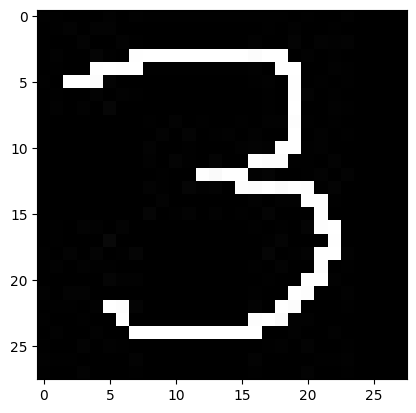

In [ ]:
import cv2
import numpy as np
# 0 - just gray - just one channel
#img_test = cv2.imread("/content/CV_3_bw.jpg",0)
img_test = cv2.imread("/content/my_handwritten_number.jpg",0)
plt.imshow(img_test, cmap=plt.get_cmap('gray'))
img_test_2 = img_test.reshape(1,28*28).astype('float32')
img_test_3 = img_test_2/255

prediction = model.predict(img_test_3)
print(np.argmax(prediction, axis=-1))
print(prediction )

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Modify sample MNIST images to have a non-black background
def add_background(image, background_intensity=100):
    """Adds a non-black background to an MNIST image by increasing pixel values."""
    return np.clip(image + background_intensity, 0, 255)  # Ensures values stay within valid range

# Apply the modification to the first few images in the dataset
X_test_modified = np.array([add_background(img) for img in X_test[:10]])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
